## 📊 LinkedIn Job Data Analysis – 2023
This project analyzes LinkedIn job listings to uncover trends in hiring patterns, skill demand, top hiring companies, job types, and locations across India. The insights aim to help job seekers, students, and recruiters make informed decisions.


## 📌 Business Questions

1. **Which cities in India have the highest demand for data-related roles?**  
   → Helps job seekers identify where to focus their job search.

2. **Which companies are hiring the most for data roles?**  
   → Useful for targeting job applications and understanding industry leaders.

3. **What types of jobs (Full-Time, Internship, etc.) are most common?**  
   → Clarifies the employment structure and hiring intent.

4. **Which industries have the most data job openings?**  
   → Reveals sector-specific demand (e.g., IT, Finance, Consulting).

5. **What skills are most in demand for data roles on LinkedIn?**  
   → Guides job seekers on which tools and technologies to upskill in.

6. **What is the distribution of seniority levels in posted jobs?**  
   → Helps understand if the market is seeking more experienced or entry-level talent.

7. **How does company popularity (followers) relate to the number of applicants?**  
   → Gives insight into job market competitiveness.

8. **Are remote or hybrid opportunities commonly offered?**  
   → Important for understanding flexibility trends in the job market.


In [40]:
import pandas as pd  # Used for handling data

# Read the dataset (you'll upload your file in Colab too)
df = pd.read_csv("linkedin_data 2023-03-31_final.csv")

# Show the first 5 rows of the dataset
df.head()


,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,3/31/2023,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,3/31/2023,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,3/31/2023,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time


In [41]:
df.shape

(1127, 10)

In [42]:
df.columns

Index(['Date', 'Job_Name', 'Company', 'Loaction', 'Job_type', 'Employees',
       'Followers', 'Applicant', 'Industry', 'Invovlement'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1127 non-null   object
 1   Job_Name     1127 non-null   object
 2   Company      1127 non-null   object
 3   Loaction     1127 non-null   object
 4   Job_type     1127 non-null   object
 5   Employees    1127 non-null   object
 6   Followers    1127 non-null   object
 7   Applicant    1126 non-null   object
 8   Industry     1126 non-null   object
 9   Invovlement  1127 non-null   object
dtypes: object(10)
memory usage: 88.2+ KB


In [44]:
df.describe()

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
count,1127,1127,1127,1127,1127,1127,1127,1126,1126,1127
unique,1,696,520,95,3,9,932,206,66,20
top,3/31/2023,Data Analyst,Accenture in India,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","8,734 followers",1 month ago O...,Information Technology & Services,Full-time · Mid-Senior level
freq,1127,69,52,285,725,548,10,31,418,517


In [45]:
print("\n🕳️ Missing Values in Each Column:")
print(df.isnull().sum())


🕳️ Missing Values in Each Column:
Date           0
Job_Name       0
Company        0
Loaction       0
Job_type       0
Employees      0
Followers      0
Applicant      1
Industry       1
Invovlement    0
dtype: int64


In [46]:
df['Applicant'].fillna(0, inplace=True)
df['Industry'].fillna("Not Specified", inplace=True)


/tmp/ipython-input-46-4088385766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Applicant'].fillna(0, inplace=True)
/tmp/ipython-input-46-4088385766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [47]:
df['Date'] = pd.to_datetime(df['Date'])


In [48]:
# Rename the typo columns
df = df.rename(columns={
    "Loaction": "Location",
    "Invovlement": "Involvement"
})

# Optional: Make all column names consistent (capitalize or lowercase)
df.columns


Index(['Date', 'Job_Name', 'Company', 'Location', 'Job_type', 'Employees',
       'Followers', 'Applicant', 'Industry', 'Involvement'],
      dtype='object')

In [49]:
# Remove commas and convert to integers for Followers
df["Followers"] = df["Followers"].str.replace(",", "")
df["Followers"] = df["Followers"].str.extract("(\d+)")
df["Followers"] = df["Followers"].astype(float)

# Same for Applicants
df["Applicant"] = df["Applicant"].str.extract("(\d+)")
df["Applicant"] = df["Applicant"].astype(float)

# Check the result
df[["Followers", "Applicant"]].head()


,Followers,Applicant
0,7366377.0,9.0
1,3791093.0,10.0
2,1068681.0,41.0
3,62010.0,13.0
4,86924.0,78.0


In [50]:
# Convert all entries to string first (to avoid .str errors)
df['Followers'] = df['Followers'].astype(str).str.replace(',', '').str.extract(r'(\d+)')[0]
df['Followers'] = pd.to_numeric(df['Followers'], errors='coerce')

df['Applicant'] = df['Applicant'].astype(str).str.extract(r'(\d+)')[0]
df['Applicant'] = pd.to_numeric(df['Applicant'], errors='coerce')

# Fill missing applicants (if any)
df['Applicant'].fillna(0, inplace=True)

# Confirm data types
print(df[['Followers', 'Applicant']].dtypes)


Followers      int64
Applicant    float64
dtype: object


/tmp/ipython-input-50-4100251002.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Applicant'].fillna(0, inplace=True)


In [51]:
# If there's a separator like '·', split into two columns
df[['Job_Mode', 'Seniority']] = df['Involvement'].str.split("·", n=1, expand=True)

# Remove extra spaces
df['Job_Mode'] = df['Job_Mode'].str.strip()
df['Seniority'] = df['Seniority'].str.strip()

# Check output
df[['Involvement', 'Job_Mode', 'Seniority']].head()


,Involvement,Job_Mode,Seniority
0,Full-time · Mid-Senior level,Full-time,Mid-Senior level
1,Full-time,Full-time,None
2,Full-time · Mid-Senior level,Full-time,Mid-Senior level
3,Full-time · Mid-Senior level,Full-time,Mid-Senior level
4,Full-time,Full-time,None


In [52]:
# Split by comma
df[['City', 'State', 'Country']] = df['Location'].str.split(",", n=2, expand=True)

# Remove spaces
df['City'] = df['City'].str.strip()
df['State'] = df['State'].str.strip()
df['Country'] = df['Country'].str.strip()

# Check output
df[['Location', 'City', 'State', 'Country']].head()


,Location,City,State,Country
0,"Trivandrum, Kerala, India",Trivandrum,Kerala,India
1,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India
2,"Bengaluru, Karnataka, India",Bengaluru,Karnataka,India
3,"Chennai, Tamil Nadu, India",Chennai,Tamil Nadu,India
4,"Mumbai, Maharashtra, India",Mumbai,Maharashtra,India


In [53]:
# Define a list of keywords
data_keywords = ["data analyst", "data scientist", "data engineer", "business analyst", "ml engineer"]

# Convert Job_Title to lowercase and check for keywords
df['Job_Name_Lower'] = df['Job_Name'].str.lower()

# Filter rows where any keyword appears in job name
df_data_roles = df[df['Job_Name_Lower'].apply(lambda x: any(keyword in x for keyword in data_keywords))]

# Check how many jobs we have
print("Number of data roles found:", len(df_data_roles))

# Display some
df_data_roles[['Job_Name', 'Company', 'City', 'Job_Mode', 'Seniority']]


Number of data roles found: 240


,Job_Name,Company,City,Job_Mode,Seniority
14,Lead Data Scientist,WUElev8 - Where yoU Elevate,Chennai,Full-time,None
20,Data Analyst,Keyloop,Hyderabad,Full-time,Associate
54,Business Analyst,Kyndryl India,Bangalore Urban,Full-time,Entry level
70,Senior Data Engineer,IT OPENDOORS LLC,Hyderabad,Full-time,None
88,Data Analyst,IKEA,Bengaluru,Full-time,None
...,...,...,...,...,...
967,Senior Data Analyst,IKEA,Bengaluru,Full-time,None
986,Supply Chain Data Analyst,HP,Bengaluru,Full-time,Mid-Senior level
1014,"Technical lead, ML Engineering",Landis+Gyr,Noida,Full-time,Mid-Senior level
1055,Supply Chain Data Analyst,HP,Bengaluru,Full-time,Mid-Senior level


In [54]:
# Continue working with this filtered dataset
df = df_data_roles


In [55]:
# Clean unwanted city names
invalid_cities = ['india', 'remote', 'work from home', 'hybrid']
df = df[~df['City'].str.lower().isin(invalid_cities)]


In [56]:
top_cities = df['City'].value_counts().head(10)
print("Top 10 Hiring Cities:\n", top_cities)


Top 10 Hiring Cities:
 City
Bengaluru          74
Mumbai             35
Pune               23
Hyderabad          18
Chennai            16
Gurgaon             9
Noida               6
Bengaluru North     6
Ramban              5
Bengaluru East      4
Name: count, dtype: int64


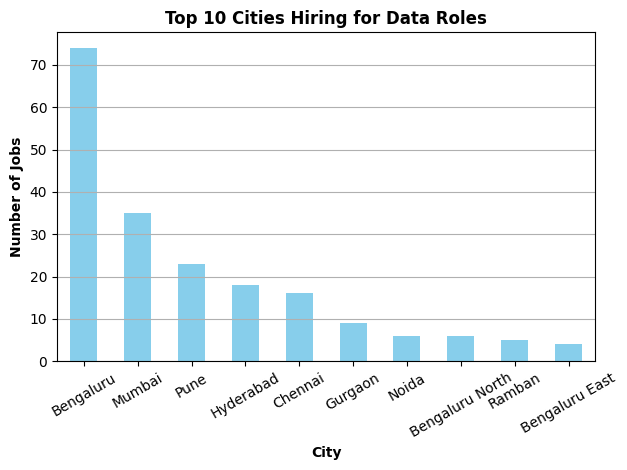

In [57]:
import matplotlib.pyplot as plt
import numpy as np

top_cities = df['City'].value_counts().head(10)
ax = top_cities.plot(kind='bar', color='skyblue')
plt.ylabel("Number of Jobs")
plt.title("Top 10 Cities Hiring for Data Roles", fontweight='bold')
plt.xlabel("City", fontweight='bold')
plt.ylabel("Number of Jobs", fontweight='bold')
plt.xticks(rotation=30)
plt.grid(axis='y')

# Set y-axis ticks to intervals of 10
ax.yaxis.set_major_locator(plt.MultipleLocator(10))

plt.tight_layout()
plt.show()

### 📍 Top 10 Cities Hiring for Data Roles
This chart shows the top cities with the highest number of data job postings. Bengaluru and Mumbai lead as expected due to their strong tech and business presence. These locations offer the best opportunities for job seekers in data roles.



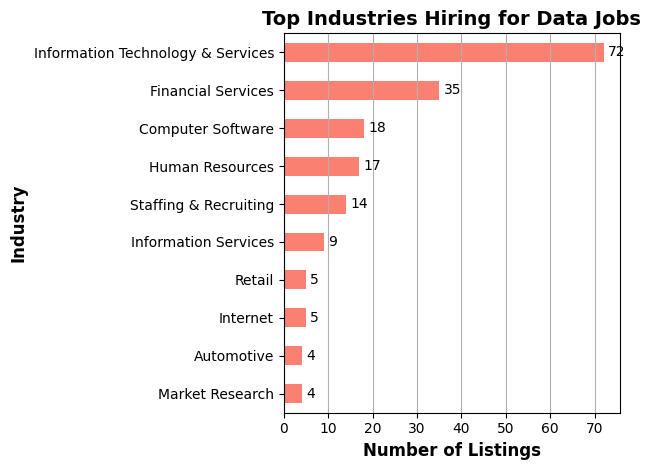

In [58]:
import matplotlib.pyplot as plt

# Get top 10 industries
top_industries = df['Industry'].value_counts().head(10)

# Plot horizontal bar chart
top_industries.plot(kind='barh', color='salmon')

# Title and axis labels
plt.title("Top Industries Hiring for Data Jobs", fontweight='bold', fontsize=14)
plt.xlabel("Number of Listings", fontweight='bold', fontsize=12)
plt.ylabel("Industry", fontweight='bold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value labels
for index, value in enumerate(top_industries):
    plt.text(value + 1, index, str(int(value)), va='center', fontsize=10)

# Improve spacing
plt.grid(axis='x')
plt.gca().invert_yaxis()  # Highest value on top
plt.tight_layout()
plt.show()


### 🏭 Industry-wise Hiring for Data Jobs
This bar chart shows the industries with the highest demand for data professionals. IT, Financial services, and Computer Software dominate, highlighting where data skills are most valued.


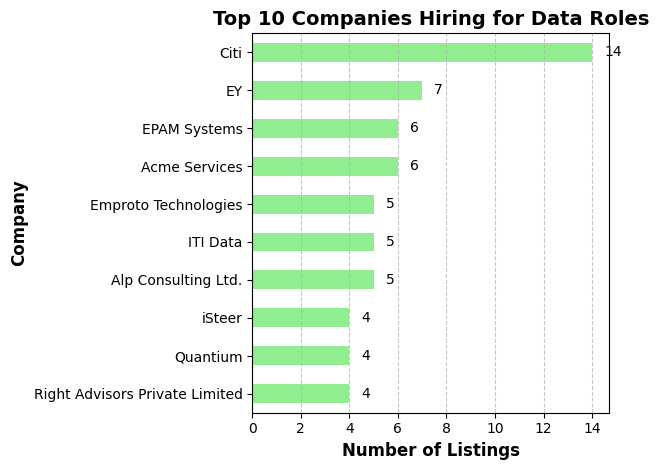

In [59]:
import matplotlib.pyplot as plt

# Get top 10 companies
top_companies = df['Company'].value_counts().head(10).sort_values()

# Plot horizontal bar chart
top_companies.plot(kind='barh', color='lightgreen')

# Title and labels
plt.title("Top 10 Companies Hiring for Data Roles", fontweight='bold', fontsize=14)
plt.xlabel("Number of Listings", fontweight='bold', fontsize=12)
plt.ylabel("Company", fontweight='bold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value labels
for i, value in enumerate(top_companies):
    plt.text(value + 0.5, i, str(int(value)), va='center', fontsize=10)

# Format grid
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', visible=False)

# Final layout
plt.tight_layout()
plt.show()


### 🏢 Top 10 Companies Hiring for Data Roles
This graph highlights the companies with the highest number of data job listings. It helps job seekers understand which companies are currently investing heavily in data talent.


In [60]:
# Keep only clean job modes
valid_modes = ['Full-time', 'Internship', 'Contract', 'Part-time']
df_filtered = df[df['Job_Mode'].isin(valid_modes)]


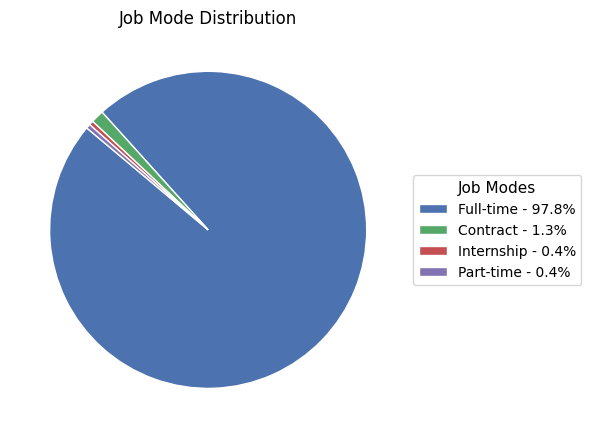

In [61]:
import matplotlib.pyplot as plt

# Filter for clean job modes
valid_modes = ['Full-time', 'Internship', 'Contract', 'Part-time']
df_filtered = df[df['Job_Mode'].isin(valid_modes)]

# Count job modes
job_mode_counts = df_filtered['Job_Mode'].value_counts()
labels = job_mode_counts.index
sizes = job_mode_counts.values

# Calculate percentages
total = sum(sizes)
percentages = [f"{label} - {value/total*100:.1f}%" for label, value in zip(labels, sizes)]

# Distinct and aesthetic color palette
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # blue, green, red, purple

# Plot pie chart (no labels inside)
plt.figure(figsize=(6, 6))
patches, _ = plt.pie(
    sizes,
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

# Add clear legend with label + % info
plt.legend(
    patches,
    percentages,
    title="Job Modes",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=11
)

plt.title("Job Mode Distribution")
plt.tight_layout()
plt.show()


### 💼 Job Type Distribution
Most job listings are full-time, indicating a high demand for permanent positions. Contract and internship roles are less common. This helps professionals understand the nature of engagement companies are offering.


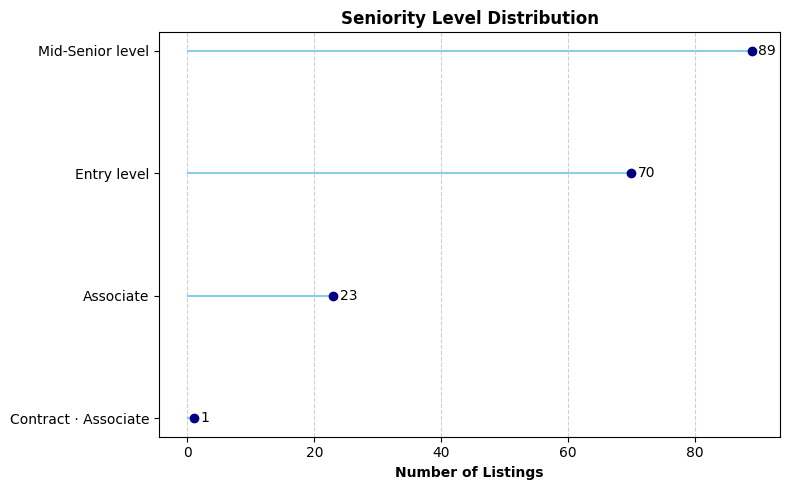

In [62]:
import matplotlib.pyplot as plt

seniority_counts = df['Seniority'].value_counts().sort_values()

# Lollipop style
plt.figure(figsize=(8, 5))
plt.hlines(y=seniority_counts.index, xmin=0, xmax=seniority_counts.values, color='skyblue')
plt.plot(seniority_counts.values, seniority_counts.index, "o", color='navy')
# Add value labels to each bar
for i, value in enumerate(seniority_counts):
    plt.text(value + 1, i, str(int(value)), va='center', fontsize=10)
plt.title("Seniority Level Distribution", fontweight='bold')
plt.xlabel("Number of Listings",fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🎓 Seniority Levels in Data Job Postings
This chart displays the distribution of roles across different seniority levels. Entry-level and associate roles are most common, indicating a healthy demand for early-career professionals.


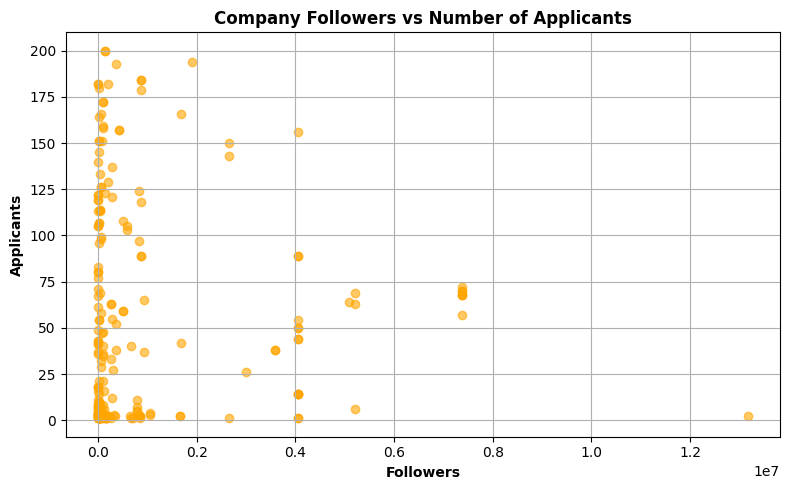

In [63]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Followers'], df['Applicant'], alpha=0.6, color='orange')
plt.title("Company Followers vs Number of Applicants", fontweight='bold')
plt.xlabel("Followers", fontweight='bold')
plt.ylabel("Applicants", fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Company Followers vs Number of Applicants
This scatter plot shows whether companies with more followers attract more applicants. There is a general trend where popular companies (more followers) receive more applications, though some exceptions exist.


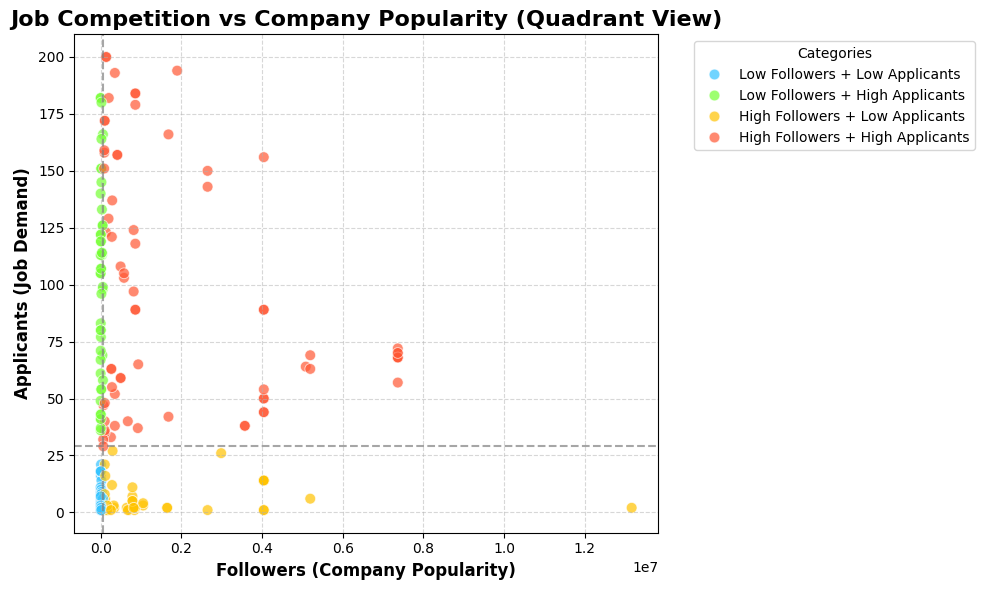

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter clean data
df_scatter = df[(df['Followers'] > 0) & (df['Applicant'] > 0)]

# Step 2: Calculate medians
median_followers = df_scatter['Followers'].median()
median_applicants = df_scatter['Applicant'].median()

# Step 3: Assign categories
def categorize(row):
    if row['Followers'] >= median_followers and row['Applicant'] >= median_applicants:
        return 'High Followers + High Applicants'
    elif row['Followers'] >= median_followers and row['Applicant'] < median_applicants:
        return 'High Followers + Low Applicants'
    elif row['Followers'] < median_followers and row['Applicant'] >= median_applicants:
        return 'Low Followers + High Applicants'
    else:
        return 'Low Followers + Low Applicants'

df_scatter['Category'] = df_scatter.apply(categorize, axis=1)

# Step 4: Color map
color_map = {
    'High Followers + High Applicants': '#FF5733',   # 🔴
    'High Followers + Low Applicants': '#FFC300',    # 🟠
    'Low Followers + High Applicants': '#75FF33',    # 🟢
    'Low Followers + Low Applicants': '#33C3FF'      # 🔵
}

# Step 5: Plot
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_scatter,
    x='Followers',
    y='Applicant',
    hue='Category',
    palette=color_map,
    alpha=0.7,
    s=60
)

# Add median lines
plt.axhline(median_applicants, linestyle='--', color='gray', alpha=0.7)
plt.axvline(median_followers, linestyle='--', color='gray', alpha=0.7)

# Labels
plt.title("Job Competition vs Company Popularity (Quadrant View)", fontsize=16, fontweight='bold')
plt.xlabel("Followers (Company Popularity)", fontweight ='bold',fontsize=12)
plt.ylabel("Applicants (Job Demand)", fontweight='bold',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 📈 Company Followers vs Number of Applicants
This scatter plot shows whether companies with more followers attract more applicants. There is a general trend where popular companies (more followers) receive more applications, though some exceptions exist.


In [65]:
print("Insights:")
print("- Bengaluru is the top hiring city for data jobs.")
print("- Most jobs are full-time, with mid-senior level roles dominating.")
print("- SQL and Python frequently appear in job titles (to be explored in Step 4).")


Insights:
- Bengaluru is the top hiring city for data jobs.
- Most jobs are full-time, with mid-senior level roles dominating.
- SQL and Python frequently appear in job titles (to be explored in Step 4).


In [66]:
# List of skills to extract
skills = ['Python', 'SQL', 'Excel', 'Power BI', 'Tableau', 'R', 'AWS']


In [67]:
# Convert all job titles to lowercase for easy matching
df['Job_Name'] = df['Job_Name'].str.lower()

# Create a new column for each skill
for skill in skills:
    df[skill] = df['Job_Name'].apply(lambda x: 1 if skill.lower() in x else 0)


/tmp/ipython-input-67-645450854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_Name'] = df['Job_Name'].str.lower()
/tmp/ipython-input-67-645450854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[skill] = df['Job_Name'].apply(lambda x: 1 if skill.lower() in x else 0)
/tmp/ipython-input-67-645450854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [68]:
import re

# Reset skill columns to 0 first (optional if rerunning)
for skill in skills:
    df[skill] = 0

# Match exact skill terms using regex boundaries
for skill in skills:
    pattern = r'\b' + re.escape(skill.lower()) + r'\b'
    df[skill] = df['Job_Name'].str.contains(pattern, regex=True).astype(int)


/tmp/ipython-input-68-1340040075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[skill] = 0
/tmp/ipython-input-68-1340040075.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[skill] = df['Job_Name'].str.contains(pattern, regex=True).astype(int)
/tmp/ipython-input-68-1340040075.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [69]:
import re

# Optional: Reset columns if you've already created them before
skills = ['Python', 'SQL', 'Power BI', 'Tableau', 'Excel', 'AWS', 'R']

# Lowercase the job titles for safer matching
df['Job_Name_clean'] = df['Job_Name'].fillna('').str.lower()

# Skill Extraction Using Regex
df['Python'] = df['Job_Name_clean'].str.contains(r'\bpython\b', regex=True).astype(int)
df['SQL'] = df['Job_Name_clean'].str.contains(r'\bsql\b', regex=True).astype(int)
df['Power BI'] = df['Job_Name_clean'].str.contains(r'\bpower[\s\-]?bi\b', regex=True).astype(int)
df['Tableau'] = df['Job_Name_clean'].str.contains(r'\btableau\b', regex=True).astype(int)
df['Excel'] = df['Job_Name_clean'].str.contains(r'\bexcel\b', regex=True).astype(int)
df['AWS'] = df['Job_Name_clean'].str.contains(r'\baws\b', regex=True).astype(int)
df['R'] = df['Job_Name_clean'].str.contains(r'\br\b', regex=True).astype(int)


/tmp/ipython-input-69-253863539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_Name_clean'] = df['Job_Name'].fillna('').str.lower()
/tmp/ipython-input-69-253863539.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Python'] = df['Job_Name_clean'].str.contains(r'\bpython\b', regex=True).astype(int)
/tmp/ipython-input-69-253863539.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [70]:
df[skills].sum().sort_values(ascending=False)


,0
Python,13
Power BI,7
SQL,6
Tableau,5
R,4
Excel,0
AWS,0


In [71]:
df.groupby('Job_Mode')[skills].sum()

,Python,SQL,Power BI,Tableau,Excel,AWS,R
Job_Mode,,,,,,,
Contract,0,0,0,0,0,0,0
Full-time,13,6,7,5,0,0,4
Internship,0,0,0,0,0,0,0
Part-time,0,0,0,0,0,0,0
"₹110,000/hr - ₹125,000/hr",0,0,0,0,0,0,0


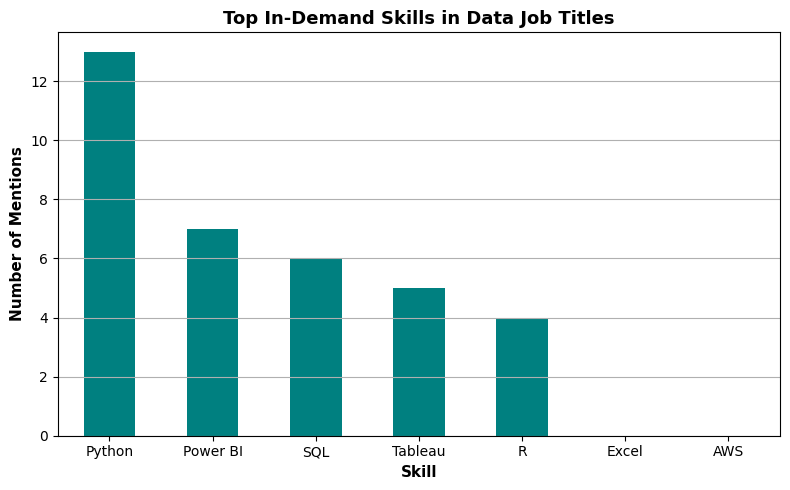

In [72]:
import matplotlib.pyplot as plt

# Calculate the total counts for each skill
skill_counts = df[skills].sum().sort_values(ascending=False) # Calculate skill_counts here

plt.figure(figsize=(8, 5))
skill_counts.plot(kind='bar', color='teal')

# 🔠 Bold title and axis labels
plt.title("Top In-Demand Skills in Data Job Titles", fontweight='bold', fontsize=13)
plt.xlabel("Skill", fontweight='bold', fontsize=11)
plt.ylabel("Number of Mentions", fontweight='bold', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 💡 Top In-Demand Skills
This chart shows the most common technical skills mentioned in job titles, like Python, and Power BI, SQL, R etc. It helps candidates prioritize which tools to master.


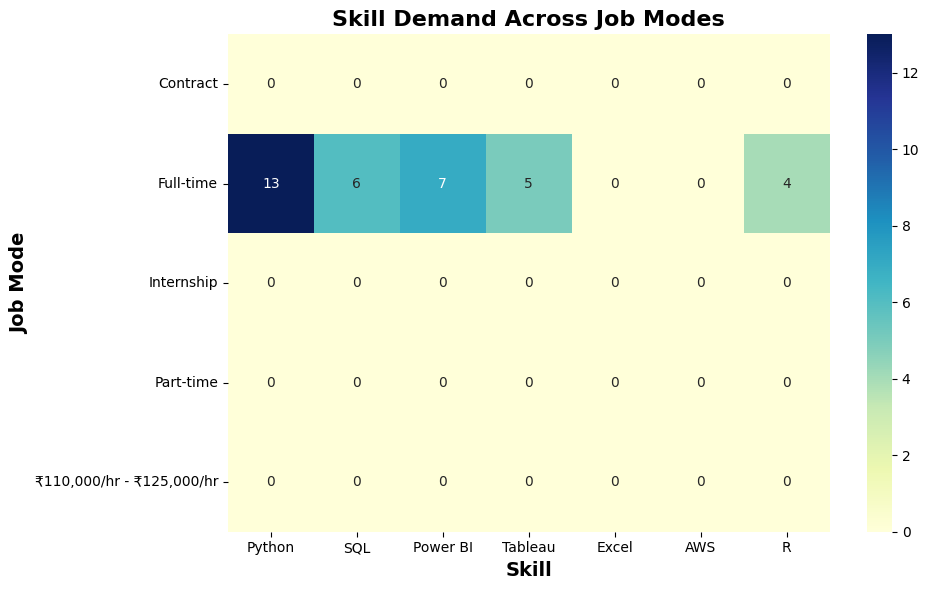

In [73]:
import seaborn as sns

# Group data by role type and sum skill mentions
role_skill_demand = df.groupby('Job_Mode')[skills].sum()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(role_skill_demand, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Skill Demand Across Job Modes", fontweight='bold', fontsize=16)
plt.xlabel("Skill", fontweight='bold', fontsize=14)
plt.ylabel("Job Mode", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### 🧠 Skill Demand Across Job Modes

This heatmap shows which technical skills are most in demand across different job types.

- Full-time roles require skills like **Python**, **Power BI**, and **SQL** the most.
- Other job modes show minimal skill mentions in the current data.

📌 Python leads as the top in-demand skill for full-time data roles.


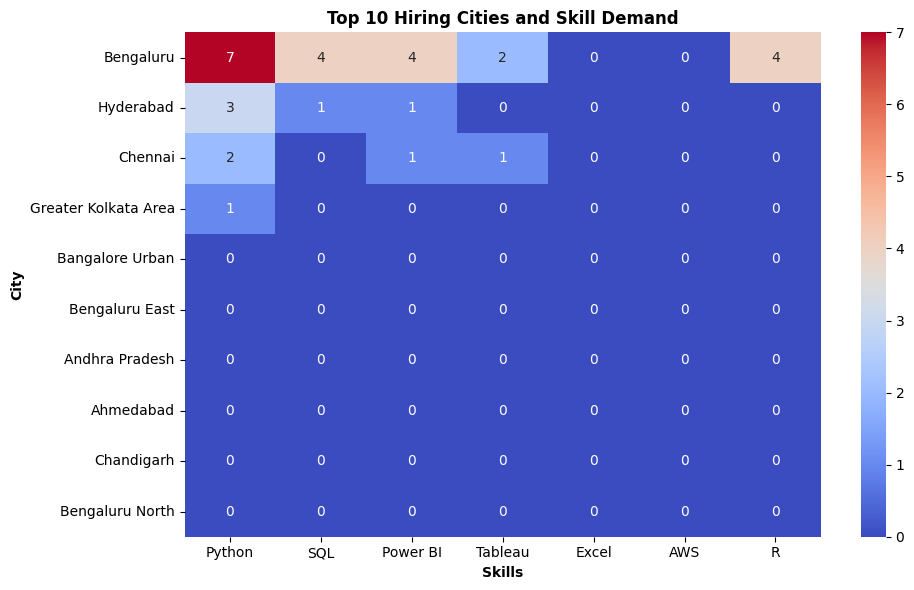

In [74]:
city_skills = df.groupby('City')[skills].sum().sort_values(by='Python', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.heatmap(city_skills, annot=True, cmap='coolwarm', fmt='d')
plt.title("Top 10 Hiring Cities and Skill Demand", fontweight='bold')
plt.xlabel("Skills", fontweight='bold')
plt.ylabel("City", fontweight='bold')
plt.tight_layout()
plt.show()


### 🗺️ Top 10 Hiring Cities and Skill Demand

This heatmap highlights the demand for technical skills across major hiring cities.

- **Bengaluru** shows the highest demand for skills like Python, Power BI, and R.
- **Hyderabad** and **Chennai** follow with moderate skill listings.
- Other cities show limited or no skill-specific demand in this dataset.

📌 Bengaluru leads both in job volume and skill diversity.


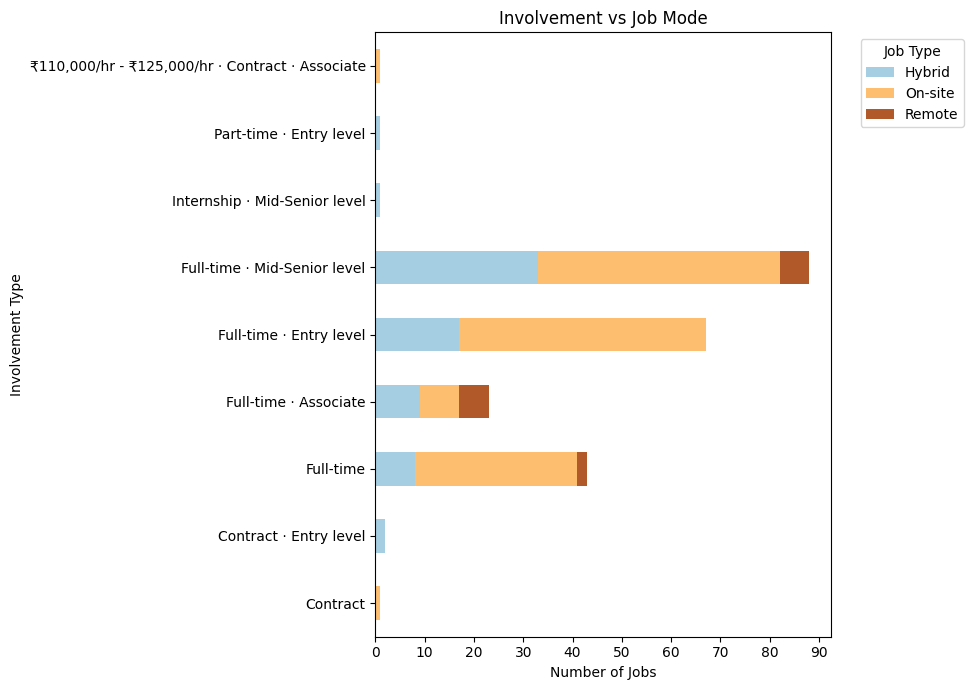

In [75]:
job_mode_vs_involvement = pd.crosstab(df['Involvement'], df['Job_type'])
plt.figure(figsize=(10, 7)) # Increase figure size
ax = job_mode_vs_involvement.plot(kind='barh', stacked=True, colormap='Paired', ax=plt.gca()) # Pass ax to plot
plt.title("Involvement vs Job Mode")
plt.xlabel("Number of Jobs") # Swap xlabel and ylabel for horizontal plot
plt.ylabel("Involvement Type") # Swap xlabel and ylabel for horizontal plot
plt.xticks(rotation=0) # No rotation needed for horizontal plot

# Set x-axis ticks to intervals of 20
ax.xaxis.set_major_locator(plt.MultipleLocator(10)) # Use xaxis for horizontal plot

# Move the legend outside the plot
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 🔄 Involvement Type vs Job Mode
This grouped chart compares job types like full-time and internship across modes like remote, on-site, and hybrid. It highlights how flexibility varies across job formats.


In [76]:
df['Applicants_per_Follower'] = df['Applicant'] / (df['Followers'] + 1)
df.sort_values('Applicants_per_Follower', ascending=False).head(10)[['Company', 'Applicants_per_Follower']]


/tmp/ipython-input-76-1822667514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Applicants_per_Follower'] = df['Applicant'] / (df['Followers'] + 1)


,Company,Applicants_per_Follower
376,HR Consultancy,0.228758
237,Entrupy,0.097430
191,Entrupy,0.097430
343,Mantys (YC W23),0.086349
401,Mantys (YC W23),0.086349
145,Excellence and Eminence LLP,0.053006
437,Excellence and Eminence LLP,0.048259
430,Vision Unlimited,0.044055
372,SULEKHA .COM NEW MEDIA PRIVATE LIMITED,0.036431
449,Emproto Technologies,0.021978


## 📌 Key Takeaways:
- Bengaluru and Mumbai are top cities for data job opportunities.
- Most roles are full-time and require entry-level or associate experience.
- IT and finance dominate hiring across industries.
- Skills like Python, SQL, R, and Power BI are in high demand.
